<a href="https://colab.research.google.com/github/DineshChauhan/DeepLearning/blob/master/MultiLabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import zipfile
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
#zf = zipfile.ZipFile('/content/gdrive/My Drive/DataSets/Multi_Label_dataset.zip')
#cd /content/gdrive/My Drive/DataSets


In [0]:
train = pd.read_csv('/content/gdrive/My Drive/DataSets/train.csv')

In [5]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [7]:
train.shape

(7254, 27)

In [8]:
train_image = []
for i in tqdm(range(train.shape[0])):
  img = image.load_img('/content/gdrive/My Drive/DataSets/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(224,224,3))
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)
X= np.array(train_image)  


100%|██████████| 7254/7254 [05:50<00:00,  3.02it/s]


In [10]:
X.shape

(7254, 224, 224, 3)

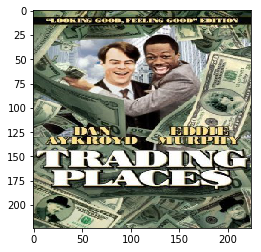

In [11]:
plt.imshow(X[2])

In [12]:
train['Genre'][2]

"['Comedy']"

In [0]:
y = np.array(train.drop(['Id','Genre'],axis=1))


In [15]:
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.1)